In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
movies = pd.read_csv("movies.csv")
users = pd.read_csv("users.dat", sep="::", names=["userId","Gender","Age","Occupation","Zip-code"])

users.head() # Display Ratings.csv data

,userId,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
# Extract Year from "Timestamp" field

import time
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005
1,1,29,3.5,2005
2,1,32,3.5,2005
3,1,47,3.5,2005
4,1,50,3.5,2005


In [4]:
display(ratings['rating'].min())
display(ratings['rating'].max())

0.5

5.0

### Data Cleaning

In [5]:
display(ratings.shape)
display(tags.shape)
display(movies.shape)

(1048575, 4)

(465564, 4)

(27278, 3)

In [6]:
# Remove Null/NA values
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [7]:
tags.dropna(how ='any',axis=0,inplace=True)

In [8]:
tags.isna().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [9]:
a=tags.tag.unique().tolist()
len (a)

38643

### 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [10]:
# filtering to get the list of drama movies
drama_movies=movies['genres'].str.contains('Drama')
movies[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


### Create a new dataset [Master_Data]

In [11]:
# merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=movies.merge(ratings,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996


In [12]:
dfMaster = movie_data_ratings_data.merge(users,on="userId",how='inner')
dfMaster.head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,M,25,15,55117
1,24,Powder (1995),Drama|Sci-Fi,3,3.0,1999,M,25,15,55117
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3,4.0,1999,M,25,15,55117


In [13]:
# displays high rated movies
high_rated= dfMaster['rating']>4.0
dfMaster[high_rated].head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
3,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3,5.0,1999,M,25,15,55117
6,175,Kids (1995),Drama,3,5.0,1999,M,25,15,55117
8,223,Clerks (1994),Comedy,3,5.0,1999,M,25,15,55117


In [14]:
# displays low rated movies
low_rated = dfMaster['rating']<4.0
dfMaster[low_rated].head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
1,24,Powder (1995),Drama|Sci-Fi,3,3.0,1999,M,25,15,55117
4,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,3,3.0,1999,M,25,15,55117
5,173,Judge Dredd (1995),Action|Crime|Sci-Fi,3,2.0,1999,M,25,15,55117


In [15]:
# top 5 most rated movies
most_rated = dfMaster.groupby('title').size().sort_values(ascending=False)[:5]
most_rated.head()

title
Pulp Fiction (1994)                 2989
Forrest Gump (1994)                 2976
Silence of the Lambs, The (1991)    2776
Shawshank Redemption, The (1994)    2751
Jurassic Park (1993)                2672
dtype: int64

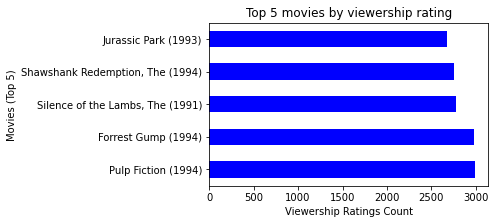

In [16]:
most_rated.plot(kind='barh',figsize=(5,3), color='b')
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 5)")
plt.title("Top 5 movies by viewership rating")
plt.show()

In [17]:
#dfMaster = dfMaster.loc[dfMaster['genres'].isin(['Sci-Fi', 'Animation', 'Comedy', 'Romance', 'Thriller', 'Horror', 'Musical','Toy Story'])]
#display(dfMaster)

# GROUPING genre & timestamp columns to find aggregate mean and size of Ratings

#mean_ratings = movie_data_ratings_data.groupby(['genres','year'], as_index=False)['rating'].aggregate(np.mean)
#mean_ratings.rename(columns={'timestamp': 'year'}, inplace=True)
mean_ratings= dfMaster.groupby(['genres','timestamp']).agg({'rating':[np.size, np.mean]})
mean_ratings.reset_index(inplace=True)
display(mean_ratings)

genres timestamp rating          
                                      size      mean
0      (no genres listed)      2015    6.0  3.333333
1                  Action      1996  327.0  3.287462
2                  Action      1997   93.0  3.043011
3                  Action      1998   24.0  2.333333
4                  Action      1999   36.0  1.888889
...                   ...       ...    ...       ...
11694             Western      2011  109.0  3.633028
11695             Western      2012   65.0  3.761538
11696             Western      2013   47.0  3.872340
11697             Western      2014   35.0  3.814286
11698             Western      2015    9.0  3.500000

[11699 rows x 4 columns]

In [18]:
# Count of unique Genres
dfMaster['genres'].value_counts().head(3)

Drama             65253
Comedy            60102
Comedy|Romance    36754
Name: genres, dtype: int64

### Explore the datasets using visual representations
#### User Age Distribution

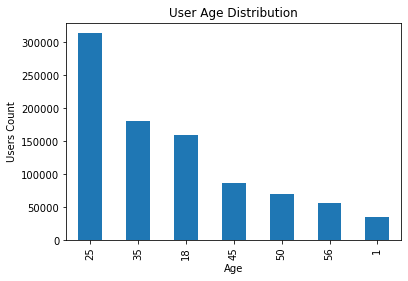

In [19]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

#### User rating of the Genre “Comedy”

In [20]:
ComedyRating = dfMaster[dfMaster['genres'].str.contains('Comedy') == True]
ComedyRating.head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,M,25,15,55117
8,223,Clerks (1994),Comedy,3,5.0,1999,M,25,15,55117
14,440,Dave (1993),Comedy|Romance,3,3.0,1999,M,25,15,55117


In [21]:
ComedyRating.groupby(["title","rating"]).size()

title                                      rating
$5 a Day (2008)                            3.0       3
                                           3.5       1
                                           4.0       1
'Hellboy': The Seeds of Creation (2004)    2.5       2
                                           3.5       1
                                                    ..
À nous la liberté (Freedom for Us) (1931)  1.0       1
                                           3.5       1
                                           4.0       1
                                           4.5       1
                                           5.0       1
Length: 24754, dtype: int64

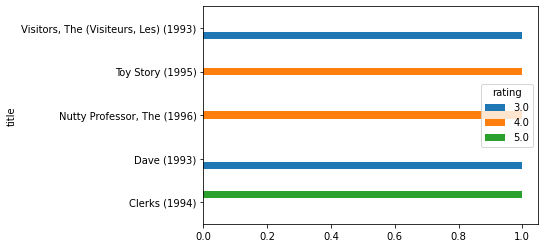

In [22]:
ComedyRating[:5].groupby(["title","rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

#### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [23]:
userId = 2696
userRatingById = dfMaster[dfMaster["userId"] == userId]
userRatingById

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
240944,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2696,3.5,2011,M,25,7,24210
240945,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2696,3.0,2011,M,25,7,24210
240946,34,Babe (1995),Children|Drama,2696,3.5,2011,M,25,7,24210
240947,39,Clueless (1995),Comedy|Romance,2696,3.5,2011,M,25,7,24210
240948,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2696,4.0,2011,M,25,7,24210
...,...,...,...,...,...,...,...,...,...,...
241105,71535,Zombieland (2009),Action|Comedy|Horror,2696,4.0,2011,M,25,7,24210
241106,77455,Exit Through the Gift Shop (2010),Comedy|Documentary,2696,3.0,2011,M,25,7,24210
241107,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,2696,3.5,2011,M,25,7,24210
241108,81562,127 Hours (2010),Adventure|Drama|Thriller,2696,3.0,2011,M,25,7,24210


### Feature Engineering
#### Find out all the unique genres

In [24]:
pip install pandas_explode

In [25]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [26]:
# Display unique Genre 
import pandas_explode # explode() function is used to transform each element of a list-like to a row, replicating the index values

a= movies.assign(genres=movies['genres'].apply(str).str.split("|")).explode('genres')
a.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


#### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [27]:
ratingsOneHot = dfMaster['genres'].str.get_dummies("|")
ratingsOneHot.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


In [28]:
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)
dfMaster.head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,M,25,15,55117,...,0,0,0,0,0,0,0,0,0,0
1,24,Powder (1995),Drama|Sci-Fi,3,3.0,1999,M,25,15,55117,...,0,0,0,0,0,0,1,0,0,0
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3,4.0,1999,M,25,15,55117,...,0,0,0,0,1,0,1,1,0,0


#### Determine the features affecting the ratings of any particular movie

In [29]:
# extract YEAR from Title column (Alternative Aproach to extract YEAR)
dfMaster['year'] =dfMaster['title'].str.extract('.*\((.*)\).*',expand = False)
dfMaster.head(3)

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,M,25,15,55117,...,0,0,0,0,0,0,0,0,0,1995
1,24,Powder (1995),Drama|Sci-Fi,3,3.0,1999,M,25,15,55117,...,0,0,0,0,0,1,0,0,0,1995
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3,4.0,1999,M,25,15,55117,...,0,0,0,1,0,1,1,0,0,1995


In [30]:
# Drop the Title column from dataset
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,movieId,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,(no genres listed),...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,M,25,15,55117,0,...,0,0,0,0,0,0,0,0,0,1995
1,24,Drama|Sci-Fi,3,3.0,1999,M,25,15,55117,0,...,0,0,0,0,0,1,0,0,0,1995
2,32,Mystery|Sci-Fi|Thriller,3,4.0,1999,M,25,15,55117,0,...,0,0,0,1,0,1,1,0,0,1995
3,50,Crime|Mystery|Thriller,3,5.0,1999,M,25,15,55117,0,...,0,0,0,1,0,0,1,0,0,1995
4,160,Action|Adventure|Mystery|Sci-Fi,3,3.0,1999,M,25,15,55117,0,...,0,0,0,1,0,1,0,0,0,1995


In [31]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901248 entries, 0 to 901247
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieId             901248 non-null  int64  
 1   genres              901248 non-null  object 
 2   userId              901248 non-null  int64  
 3   rating              901248 non-null  float64
 4   timestamp           901248 non-null  object 
 5   Gender              901248 non-null  object 
 6   Age                 901248 non-null  int64  
 7   Occupation          901248 non-null  int64  
 8   Zip-code            901248 non-null  object 
 9   (no genres listed)  901248 non-null  int64  
 10  Action              901248 non-null  int64  
 11  Adventure           901248 non-null  int64  
 12  Animation           901248 non-null  int64  
 13  Children            901248 non-null  int64  
 14  Comedy              901248 non-null  int64  
 15  Crime               901248 non-nul

In [32]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','1')
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','0')
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [33]:
dfMaster.head()

,movieId,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,(no genres listed),...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999,0,25,15,55117,0,...,0,0,0,0,0,0,0,0,0,1995
1,24,Drama|Sci-Fi,3,3.0,1999,0,25,15,55117,0,...,0,0,0,0,0,1,0,0,0,1995
2,32,Mystery|Sci-Fi|Thriller,3,4.0,1999,0,25,15,55117,0,...,0,0,0,1,0,1,1,0,0,1995
3,50,Crime|Mystery|Thriller,3,5.0,1999,0,25,15,55117,0,...,0,0,0,1,0,0,1,0,0,1995
4,160,Action|Adventure|Mystery|Sci-Fi,3,3.0,1999,0,25,15,55117,0,...,0,0,0,1,0,1,0,0,0,1995


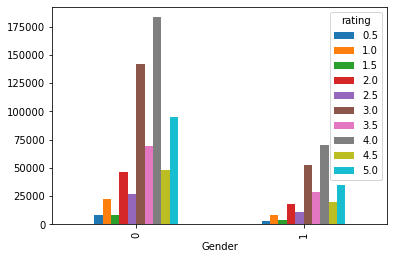

In [34]:
dfMaster.groupby(["Gender","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

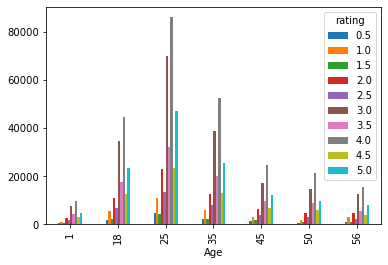

In [35]:
dfMaster.groupby(["Age","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

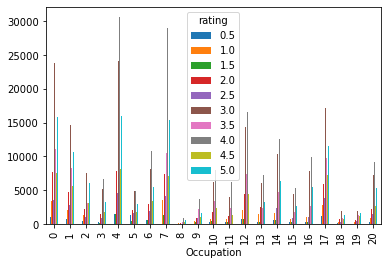

In [36]:
dfMaster.groupby(["Occupation","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

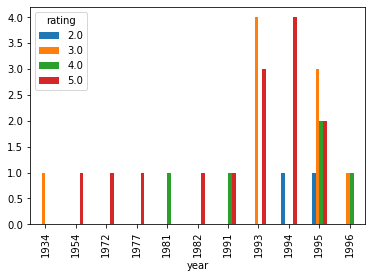

In [37]:
dfMaster[:30].groupby(["year","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

### Develop an appropriate model to predict the movie ratings

In [65]:
dfMaster = dfMaster[:1000]
X = dfMaster[['movieId','Age','Occupation']].values
y = dfMaster[['rating']].values

In [66]:
#ENCODING THE CATEGORICAL DEPENDENT VARIABLE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 1 2 3 1 0 3 1 3 3 3 3 3 1 1 1 3 3 3 0 3 2 3 2 1 1 2 3 3 1 2 3 3 1 1 3 3
 2 2 3 3 2 3 2 2 1 3 1 0 2]


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
#Feature Scaling : Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# Training the Logistic Regression Model on the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [70]:
#Predict the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a1=accuracy_score(y_test,y_pred)
print(a1)

[[0 0 3]
 [0 0 4]
 [0 0 8]]
0.5333333333333333


In [71]:
# Support Vector Machine
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [72]:
#Predict the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a2=accuracy_score(y_test,y_pred)
print(a2)

[[0 0 3]
 [0 0 4]
 [0 0 8]]
0.5333333333333333


In [73]:
#Train the training set based on Random Forest Algo
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
#Predict the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a3=accuracy_score(y_test,y_pred)
print(a3)

[[0 0 3]
 [1 2 1]
 [3 1 4]]
0.4


In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Random Forest'],
    'Score': [a1, a2, a3]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.533333
1,Support Vector Machines,0.533333
2,Random Forest,0.400000
